In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
# visualization library
import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set_context(rc={"font.family":'sans',"font.size":24,"axes.titlesize":24,"axes.labelsize":15}) 
import xlsxwriter

In [6]:
[i for i  in 10.0 ** -np.arange(-1, 5)]

[10.0, 1.0, 0.1, 0.01, 0.001, 0.0001]

# Grafica de distribución de género y edad por cada CRG

In [2]:
data_FEM_CRG1000 = np.fromfile('data/old/data_FEM_CRG1000.dat', dtype=float)
data_FEM_CRG5192 = np.fromfile('data/old/data_FEM_CRG5192.dat', dtype=float)
data_FEM_CRG7071 = np.fromfile('data/old/data_FEM_CRG7071.dat', dtype=float)
data_FEM_CRG5424 = np.fromfile('data/old/data_FEM_CRG5424.dat', dtype=float)
data_FEM_CRG6144 = np.fromfile('data/old/data_FEM_CRG6144.dat', dtype=float)

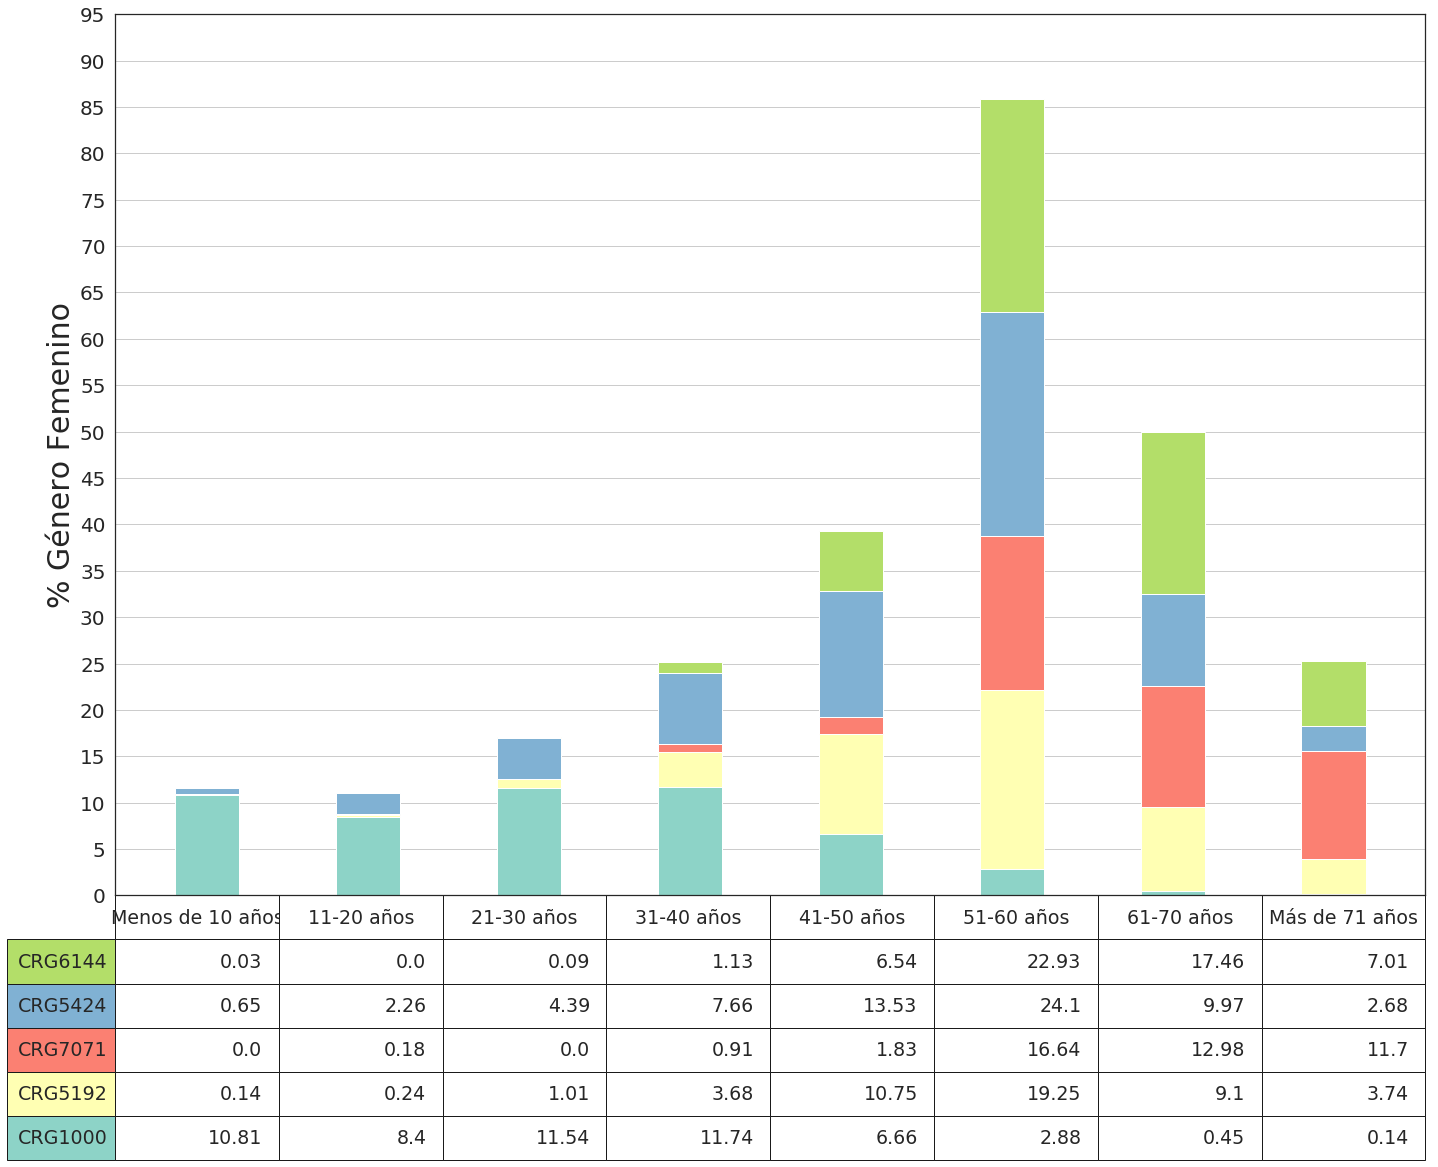

In [20]:
data = [data_FEM_CRG1000,
        data_FEM_CRG5192,
        data_FEM_CRG7071,
        data_FEM_CRG5424,
        data_FEM_CRG6144]

labels = ['Menos de 10 años', '11-20 años','21-30 años', '31-40 años', 
          '41-50 años', '51-60 años','61-70 años', 'Más de 71 años']
rows = ['CRG1000', 'CRG5192', 'CRG7071', 'CRG5424', 'CRG6144']


colors = plt.cm.Set3(np.linspace(0, 0.5, len(rows)))
N = len(labels)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

plt.figure(figsize=(26,18))
n_rows = len(data)

index = np.arange(len(labels)) + 0.3
bar_width = 0.4

# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.zeros(len(labels))

# Plot bars and create text labels for the table

for row in range(n_rows):
    plt.bar(index, data[row], bar_width, bottom=y_offset, color=colors[row])
    y_offset = y_offset + data[row]
# Reverse colors and text labels to display the last value at the top.
colors = colors[::-1]
data.reverse()
rows.reverse()
the_table = plt.table(cellText=data,
                      rowLabels=rows,
                      colLabels=labels,
                      rowColours=colors,
                      loc='bottom',
                     bbox=[0.0, -0.3, 1, 0.3])
the_table.auto_set_font_size(False)
the_table.set_fontsize(19)
plt.subplots_adjust(left=0.2, bottom=0.2)
plt.ylabel('% Género Femenino', fontsize=30)
plt.xticks([])
plt.tick_params(labelsize=20)
plt.yticks(np.arange(0, 100, 5))
plt.grid()
#plt.tight_layout()
plt.savefig("FemeninoEdad.png")
plt.show()

In [21]:
data_MAS_CRG1000 = np.fromfile('data/old/data_MAS_CRG1000.dat', dtype=float)
data_MAS_CRG5192 = np.fromfile('data/old/data_MAS_CRG5192.dat', dtype=float)
data_MAS_CRG7071 = np.fromfile('data/old/data_MAS_CRG7071.dat', dtype=float)
data_MAS_CRG5424 = np.fromfile('data/old/data_MAS_CRG5424.dat', dtype=float)
data_MAS_CRG6144 = np.fromfile('data/old/data_MAS_CRG6144.dat', dtype=float)

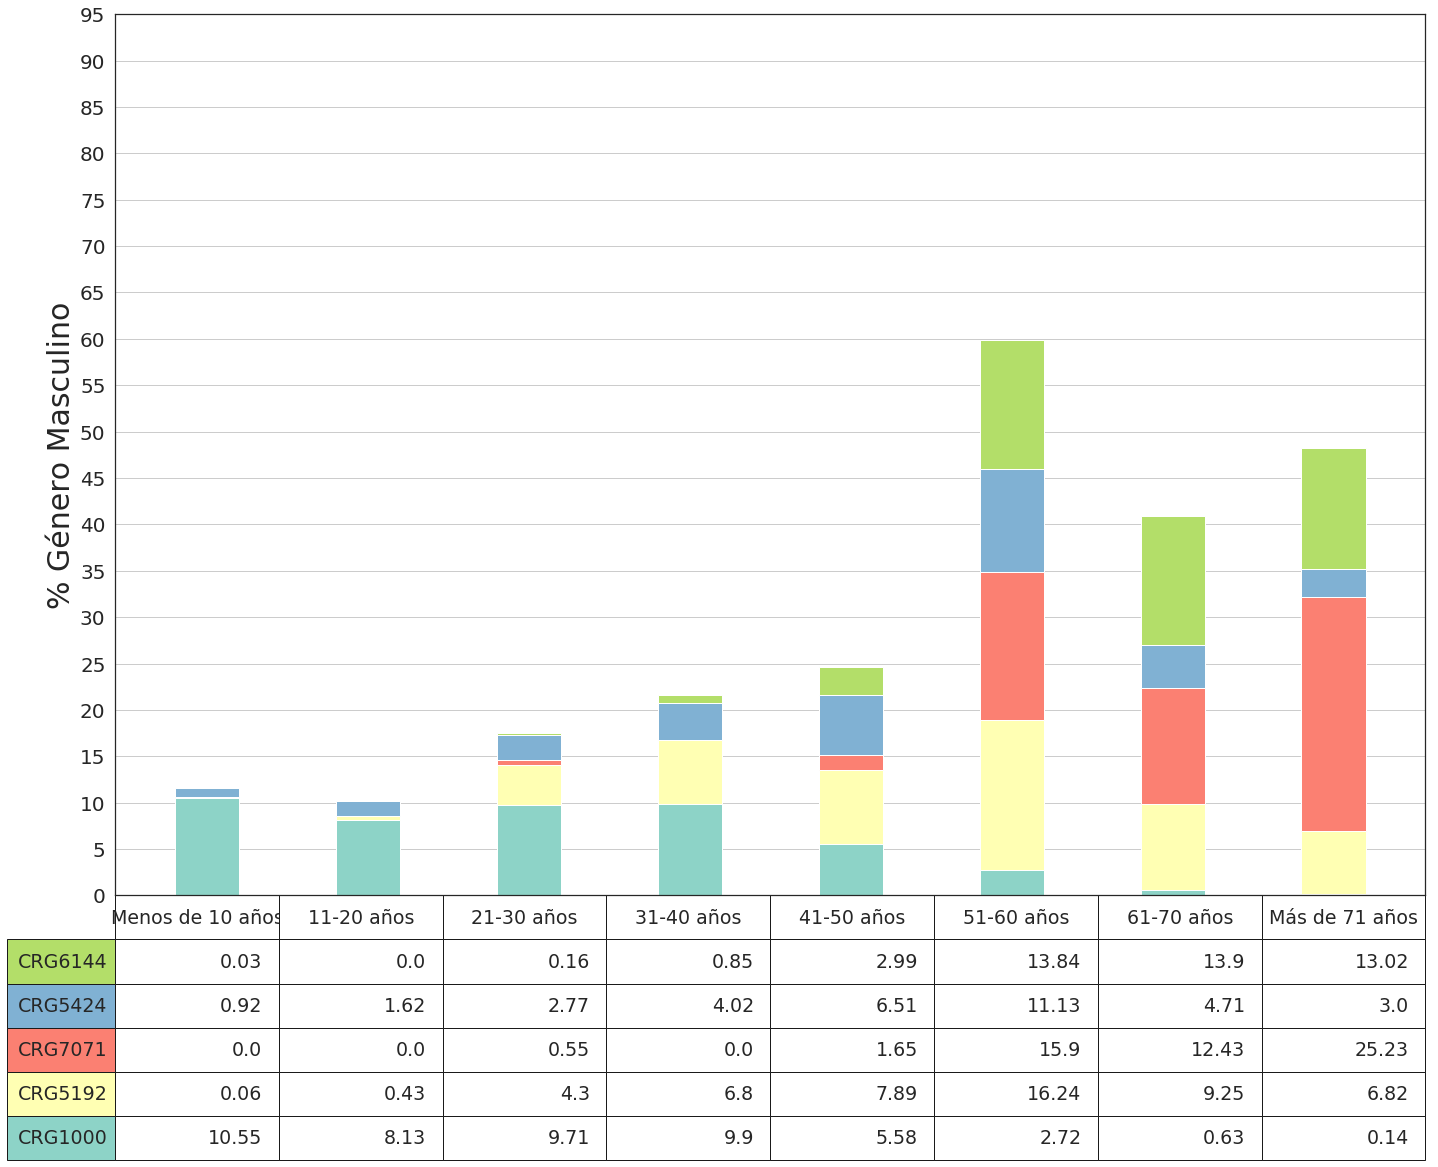

In [23]:
data = [data_MAS_CRG1000,
        data_MAS_CRG5192,
        data_MAS_CRG7071,
        data_MAS_CRG5424,
        data_MAS_CRG6144]

labels = ['Menos de 10 años', '11-20 años','21-30 años', '31-40 años', 
          '41-50 años', '51-60 años','61-70 años', 'Más de 71 años']
rows = ['CRG1000', 'CRG5192', 'CRG7071', 'CRG5424', 'CRG6144']


colors = plt.cm.Set3(np.linspace(0, 0.5, len(rows)))
N = len(labels)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

plt.figure(figsize=(26,18))
n_rows = len(data)

index = np.arange(len(labels)) + 0.3
bar_width = 0.4

# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.zeros(len(labels))

# Plot bars and create text labels for the table

for row in range(n_rows):
    plt.bar(index, data[row], bar_width, bottom=y_offset, color=colors[row])
    y_offset = y_offset + data[row]
# Reverse colors and text labels to display the last value at the top.
colors = colors[::-1]
data.reverse()
rows.reverse()
the_table = plt.table(cellText=data,
                      rowLabels=rows,
                      colLabels=labels,
                      rowColours=colors,
                      loc='bottom',
                     bbox=[0.0, -0.3, 1, 0.3])
the_table.auto_set_font_size(False)
the_table.set_fontsize(19)
plt.subplots_adjust(left=0.2, bottom=0.2)
plt.ylabel('% Género Masculino', fontsize=30)
plt.xticks([])
plt.tick_params(labelsize=20)
plt.yticks(np.arange(0, 100, 5))
plt.grid()
#plt.tight_layout()
plt.savefig("MasculinoEdad.png")
plt.show()

-------------------------------------------------------------------

# Rellenado la Tabla de Información de CRGs

In [16]:
crg_7071 = pd.read_csv('../CRGs/datasets/matrix_CRG7071.csv')
crg_1000 = pd.read_csv('../CRGs/datasets/matrix_CRG1000.csv')
crg_6144 = pd.read_csv('../CRGs/datasets/matrix_CRG6144.csv')
crg_5192 = pd.read_csv('../CRGs/datasets/matrix_CRG5192.csv')
crg_5424 = pd.read_csv('../CRGs/datasets/matrix_CRG5424.csv')

## 1000

In [17]:
Diagnosticos = (crg_1000[crg_1000.columns[2:1519]]>0)*1

Enfermedades = (crg_1000[crg_1000.columns[2:1001]]>0)*1

Codigos_V = (crg_1000[crg_1000.columns[1001:1092]]>0)*1

Codigos_E = (crg_1000[crg_1000.columns[1092:1321]]>0)*1

Codigos_M = (crg_1000[crg_1000.columns[1321:1519]]>0)*1

Farmacia = (crg_1000[crg_1000.columns[1519:]]>0)*1

CIE9_1000 = len([p for p in Diagnosticos.sum(axis=1) if p !=0])

CIE9_1000_uti=len([p for p in Diagnosticos[list(Diagnosticos.columns.values)][Diagnosticos[list(Diagnosticos.columns.values)]==1].sum() if p !=0])

enf_util = len([p for p in Enfermedades[list(Enfermedades.columns.values)][Enfermedades[list(Enfermedades.columns.values)]==1].sum() if p !=0])

v_util = len([p for p in Codigos_V[list(Codigos_V.columns.values)][Codigos_V[list(Codigos_V.columns.values)]==1].sum() if p !=0])

e_util = len([p for p in Codigos_E[list(Codigos_E.columns.values)][Codigos_E[list(Codigos_E.columns.values)]==1].sum() if p !=0])

m_util = len([p for p in Codigos_M[list(Codigos_M.columns.values)][Codigos_M[list(Codigos_M.columns.values)]==1].sum() if p !=0])

ATC_1000 = len([p for p in Farmacia.sum(axis=1) if p !=0])

farm_util = len([p for p in Farmacia[list(Farmacia.columns.values)][Farmacia[list(Farmacia.columns.values)]==1].sum() if p !=0])

farm_cont = round(sum(crg_1000[crg_1000.columns[1519:]].sum())/crg_1000.shape[0], 2)

diag_cont=round(sum(crg_1000[crg_1000.columns[2:1519]].sum())/crg_1000.shape[0], 2)

info_1000 = [crg_1000.shape[0], (CIE9_1000, round((CIE9_1000/crg_1000.shape[0])*100)), len(Diagnosticos.transpose()),CIE9_1000_uti, 
             enf_util, v_util, e_util, m_util, round(sum(Diagnosticos.sum())/crg_1000.shape[0], 2), 
             diag_cont, ATC_1000, len(Farmacia.transpose()),farm_util, round(sum(Farmacia.sum())/crg_1000.shape[0], 2), farm_cont]

## 5192

In [18]:
Diagnosticos = (crg_5192[crg_5192.columns[2:1519]]>0)*1

Enfermedades = (crg_5192[crg_5192.columns[2:1001]]>0)*1

Codigos_V = (crg_5192[crg_5192.columns[1001:1092]]>0)*1

Codigos_E = (crg_5192[crg_5192.columns[1092:1321]]>0)*1

Codigos_M = (crg_5192[crg_5192.columns[1321:1519]]>0)*1

Farmacia = (crg_5192[crg_5192.columns[1519:]]>0)*1

CIE9_5192 = len([p for p in Diagnosticos.sum(axis=1) if p !=0])

CIE9_5192_uti=len([p for p in Diagnosticos[list(Diagnosticos.columns.values)][Diagnosticos[list(Diagnosticos.columns.values)]==1].sum() if p !=0])

enf_util = len([p for p in Enfermedades[list(Enfermedades.columns.values)][Enfermedades[list(Enfermedades.columns.values)]==1].sum() if p !=0])

v_util = len([p for p in Codigos_V[list(Codigos_V.columns.values)][Codigos_V[list(Codigos_V.columns.values)]==1].sum() if p !=0])

e_util = len([p for p in Codigos_E[list(Codigos_E.columns.values)][Codigos_E[list(Codigos_E.columns.values)]==1].sum() if p !=0])

m_util = len([p for p in Codigos_M[list(Codigos_M.columns.values)][Codigos_M[list(Codigos_M.columns.values)]==1].sum() if p !=0])

ATC_5192 = len([p for p in Farmacia.sum(axis=1) if p !=0])

farm_util = len([p for p in Farmacia[list(Farmacia.columns.values)][Farmacia[list(Farmacia.columns.values)]==1].sum() if p !=0])

farm_cont = round(sum(crg_5192[crg_5192.columns[1519:]].sum())/crg_5192.shape[0], 2)

diag_cont=round(sum(crg_5192[crg_5192.columns[2:1519]].sum())/crg_5192.shape[0], 2)

info_5192 = [crg_5192.shape[0], (CIE9_5192, round((CIE9_5192/crg_5192.shape[0])*100)), len(Diagnosticos.transpose()),CIE9_5192_uti, 
             enf_util, v_util, e_util, m_util, round(sum(Diagnosticos.sum())/crg_5192.shape[0], 2), 
             diag_cont, ATC_5192, len(Farmacia.transpose()),farm_util, round(sum(Farmacia.sum())/crg_5192.shape[0], 2), farm_cont]

## 5424

In [19]:
Diagnosticos = (crg_5424[crg_5424.columns[2:1519]]>0)*1

Enfermedades = (crg_5424[crg_5424.columns[2:1001]]>0)*1

Codigos_V = (crg_5424[crg_5424.columns[1001:1092]]>0)*1

Codigos_E = (crg_5424[crg_5424.columns[1092:1321]]>0)*1

Codigos_M = (crg_5424[crg_5424.columns[1321:1519]]>0)*1

Farmacia = (crg_5424[crg_5424.columns[1519:]]>0)*1

CIE9_5424 = len([p for p in Diagnosticos.sum(axis=1) if p !=0])

CIE9_5424_uti=len([p for p in Diagnosticos[list(Diagnosticos.columns.values)][Diagnosticos[list(Diagnosticos.columns.values)]==1].sum() if p !=0])

enf_util = len([p for p in Enfermedades[list(Enfermedades.columns.values)][Enfermedades[list(Enfermedades.columns.values)]==1].sum() if p !=0])

v_util = len([p for p in Codigos_V[list(Codigos_V.columns.values)][Codigos_V[list(Codigos_V.columns.values)]==1].sum() if p !=0])

e_util = len([p for p in Codigos_E[list(Codigos_E.columns.values)][Codigos_E[list(Codigos_E.columns.values)]==1].sum() if p !=0])

m_util = len([p for p in Codigos_M[list(Codigos_M.columns.values)][Codigos_M[list(Codigos_M.columns.values)]==1].sum() if p !=0])

ATC_5424 = len([p for p in Farmacia.sum(axis=1) if p !=0])

farm_util = len([p for p in Farmacia[list(Farmacia.columns.values)][Farmacia[list(Farmacia.columns.values)]==1].sum() if p !=0])

farm_cont = round(sum(crg_5424[crg_5424.columns[1519:]].sum())/crg_5424.shape[0], 2)

diag_cont=round(sum(crg_5424[crg_5424.columns[2:1519]].sum())/crg_5424.shape[0], 2)

info_5424 = [crg_5424.shape[0], (CIE9_5424, round((CIE9_5424/crg_5424.shape[0])*100)), len(Diagnosticos.transpose()),CIE9_5424_uti, 
             enf_util, v_util, e_util, m_util, round(sum(Diagnosticos.sum())/crg_5424.shape[0], 2), 
             diag_cont, ATC_5424, len(Farmacia.transpose()),farm_util, round(sum(Farmacia.sum())/crg_5424.shape[0], 2), farm_cont]

## 6144

In [20]:
Diagnosticos = (crg_6144[crg_6144.columns[2:1519]]>0)*1

Enfermedades = (crg_6144[crg_6144.columns[2:1001]]>0)*1

Codigos_V = (crg_6144[crg_6144.columns[1001:1092]]>0)*1

Codigos_E = (crg_6144[crg_6144.columns[1092:1321]]>0)*1

Codigos_M = (crg_6144[crg_6144.columns[1321:1519]]>0)*1

Farmacia = (crg_6144[crg_6144.columns[1519:]]>0)*1

CIE9_6144 = len([p for p in Diagnosticos.sum(axis=1) if p !=0])

CIE9_6144_uti=len([p for p in Diagnosticos[list(Diagnosticos.columns.values)][Diagnosticos[list(Diagnosticos.columns.values)]==1].sum() if p !=0])

enf_util = len([p for p in Enfermedades[list(Enfermedades.columns.values)][Enfermedades[list(Enfermedades.columns.values)]==1].sum() if p !=0])

v_util = len([p for p in Codigos_V[list(Codigos_V.columns.values)][Codigos_V[list(Codigos_V.columns.values)]==1].sum() if p !=0])

e_util = len([p for p in Codigos_E[list(Codigos_E.columns.values)][Codigos_E[list(Codigos_E.columns.values)]==1].sum() if p !=0])

m_util = len([p for p in Codigos_M[list(Codigos_M.columns.values)][Codigos_M[list(Codigos_M.columns.values)]==1].sum() if p !=0])

ATC_6144 = len([p for p in Farmacia.sum(axis=1) if p !=0])

farm_util = len([p for p in Farmacia[list(Farmacia.columns.values)][Farmacia[list(Farmacia.columns.values)]==1].sum() if p !=0])

farm_cont = round(sum(crg_6144[crg_6144.columns[1519:]].sum())/crg_6144.shape[0], 2)

diag_cont=round(sum(crg_6144[crg_6144.columns[2:1519]].sum())/crg_6144.shape[0], 2)

info_6144 = [crg_6144.shape[0], (CIE9_6144, round((CIE9_6144/crg_6144.shape[0])*100)), len(Diagnosticos.transpose()),CIE9_6144_uti, 
             enf_util, v_util, e_util, m_util, round(sum(Diagnosticos.sum())/crg_6144.shape[0], 2), 
             diag_cont, ATC_6144, len(Farmacia.transpose()),farm_util, round(sum(Farmacia.sum())/crg_6144.shape[0], 2), farm_cont]

## 7071

In [21]:
Diagnosticos = (crg_7071[crg_7071.columns[2:1519]]>0)*1

Enfermedades = (crg_7071[crg_7071.columns[2:1001]]>0)*1

Codigos_V = (crg_7071[crg_7071.columns[1001:1092]]>0)*1

Codigos_E = (crg_7071[crg_7071.columns[1092:1321]]>0)*1

Codigos_M = (crg_7071[crg_7071.columns[1321:1519]]>0)*1

Farmacia = (crg_7071[crg_7071.columns[1519:]]>0)*1

CIE9_7071 = len([p for p in Diagnosticos.sum(axis=1) if p !=0])

CIE9_7071_uti=len([p for p in Diagnosticos[list(Diagnosticos.columns.values)][Diagnosticos[list(Diagnosticos.columns.values)]==1].sum() if p !=0])

enf_util = len([p for p in Enfermedades[list(Enfermedades.columns.values)][Enfermedades[list(Enfermedades.columns.values)]==1].sum() if p !=0])

v_util = len([p for p in Codigos_V[list(Codigos_V.columns.values)][Codigos_V[list(Codigos_V.columns.values)]==1].sum() if p !=0])

e_util = len([p for p in Codigos_E[list(Codigos_E.columns.values)][Codigos_E[list(Codigos_E.columns.values)]==1].sum() if p !=0])

m_util = len([p for p in Codigos_M[list(Codigos_M.columns.values)][Codigos_M[list(Codigos_M.columns.values)]==1].sum() if p !=0])

ATC_7071 = len([p for p in Farmacia.sum(axis=1) if p !=0])

farm_util = len([p for p in Farmacia[list(Farmacia.columns.values)][Farmacia[list(Farmacia.columns.values)]==1].sum() if p !=0])

farm_cont = round(sum(crg_7071[crg_7071.columns[1519:]].sum())/crg_7071.shape[0], 2)

diag_cont=round(sum(crg_7071[crg_7071.columns[2:1519]].sum())/crg_7071.shape[0], 2)

info_7071 = [crg_7071.shape[0], (CIE9_7071, round((CIE9_7071/crg_7071.shape[0])*100)), len(Diagnosticos.transpose()),CIE9_7071_uti, 
             enf_util, v_util, e_util, m_util, round(sum(Diagnosticos.sum())/crg_7071.shape[0], 2), 
             diag_cont, ATC_7071, len(Farmacia.transpose()),farm_util, round(sum(Farmacia.sum())/crg_7071.shape[0], 2), farm_cont]

In [22]:
columnas = ['Pacientes en cada grupo', 'Pacientes con al menos un código CIE-9', 'Número posible de códigos CIE-9', 'Códigos CIE-9 diferentes utilizados',
            'Códigos Enfermedades diferentes utilizados','Códigos V diferentes utilizados', 'Códigos E diferentes utilizados', 
            'Códigos M diferentes utilizados', 'Códigos CIE-9 diferentes por paciente en cada grupo','Tasa media de códigos CIE-9 por paciente del grupo',
            'Pacientes con al menos un código ATC','Número posible de códigos ATC', 'Códigos ATC diferentess utilizados',
            'Códigos ATC diferentes por paciente en cada grupo', 'Tasa media de códigos ATC por paciente del grupoo']
probs = pd.DataFrame({"Datos": columnas, "CRG1000": info_1000, "CRG5192": info_5192, "CRG5424": info_5424,
                      "CRG6144": info_6144, "CRG7071": info_7071})

In [23]:
probs

,Datos,CRG1000,CRG5192,CRG5424,CRG6144,CRG7071
0,Pacientes en cada grupo,46835,12447,2166,3179,547
1,Pacientes con al menos un código CIE-9,"(45043, 96)","(11903, 96)","(2101, 97)","(3090, 97)","(533, 97)"
2,Número posible de códigos CIE-9,1517,1517,1517,1517,1517
3,Códigos CIE-9 diferentes utilizados,614,588,404,445,387
4,Códigos Enfermedades diferentes utilizados,548,541,380,417,360
5,Códigos V diferentes utilizados,42,47,24,28,27
6,Códigos E diferentes utilizados,23,0,0,0,0
7,Códigos M diferentes utilizados,1,0,0,0,0
8,Códigos CIE-9 diferentes por paciente en cada ...,2.7,4.84,4.31,6,9.52
9,Tasa media de códigos CIE-9 por paciente del g...,4.27,12.96,13.28,18.74,32.15


In [24]:
writer = pd.ExcelWriter('Probs-CRG.xlsx', engine='xlsxwriter')
probs.to_excel(writer,'Sheet1',index=False)
writer.save()